# House Prices Advanced Regression Techniques

# **Summary**

Exploring housing sale prices in *Ames, Iowa*, offers a fascinating opportunity to uncover the relationship between various house features and their impact on sale prices. Using a rich dataset with detailed house attributes, the goal is to predict sale prices by leveraging techniques like data cleaning, feature engineering, and selection. Many features exhibit linear relationships with sale price, making models like Random Forest Regression, Lasso, and Ridge Regression particularly suitable for this task. Through careful handling of missing values, thoughtful transformations, and iterative testing, we can build an accurate and reliable model that captures the underlying trends in housing data.

# **Goal**

Use the dataset after normalization, filling in missing values and adding new features with a linear regression model to predict sales prices.

# **Method**

There are a large number of features in this data set and in order to create a good prediction there will have to be a fair amount of work to do in advance. Combining the train and test set will means changes only need to be done once across both data sets. We will be exploring the following steps:

# **Correlation**

Feature Exploration

Missing Values

Data Normilization

Feature Engineering

Assembling dataset'


# New section
# Prediction
There should be several good indicators for sale price, the challenge will be in normalization of the data and feature engineering.

In [ ]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LassoLarsCV, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor

# Modelling Helpers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer, scale, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
traindf = pd.read_csv('/content/train.csv')
testdf = pd.read_csv('/content/test.csv')
# create a single dataframe of both the training and testing data
wholedf = pd.concat([traindf,testdf])
wholedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [ ]:
wholedf.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


### The Data Overview

The dataset consists of a wide range of integer, float, and categorical information. While these features will eventually be converted into numeric values, they are not in numeric form yet. The data can be grouped into several categories, and understanding the differences will help in feature creation. These categories include:

1. **Neighborhood**  
   Information about the neighborhood, zoning, and lot characteristics.  
   **Examples:** MSSubClass, LandContour, Neighborhood, BldgType

2. **Dates**  
   Time-based data describing when the house was built, remodeled, or sold.  
   **Examples:** YearBuilt, YearRemodAdd, GarageYrBlt, YrSold

3. **Quality/Condition**  
   Categorical assessments of various house features, likely from the property assessor.  
   **Examples:** PoolQC, SaleCondition, GarageQual, HeatingQC

4. **Property Features**  
   A collection of categorical features describing additional aspects of the building.  
   **Examples:** Foundation, Exterior1st, BsmtFinType1, Utilities

5. **Square Footage**  
   Area measurements of sections of the building and features like porches and lot area (in acres).  
   **Examples:** TotalBsmtSF, GrLivArea, GarageArea, PoolArea, LotArea

6. **Room/Feature Count**  
   Quantitative counts of features (as opposed to categorical), which are prime candidates for feature engineering.  
   **Examples:** FullBath, BedroomAbvGr, Fireplaces, GarageCars

7. **Pricing**  
   Monetary values, with the sales price being the target variable to predict.  
   **Examples:** SalePrice, MiscVal


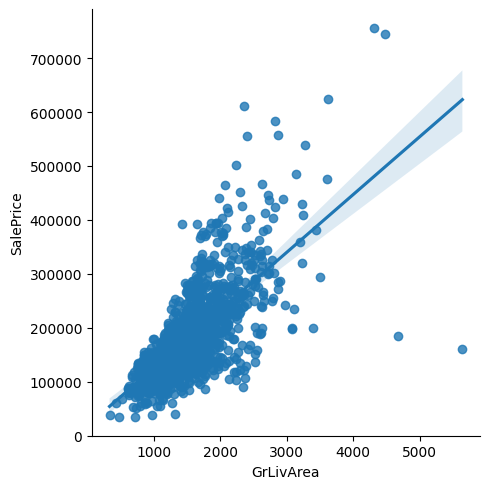

In [ ]:
sns.lmplot(x="GrLivArea", y="SalePrice", data=wholedf);
plt.ylim(0,)
plt.show()

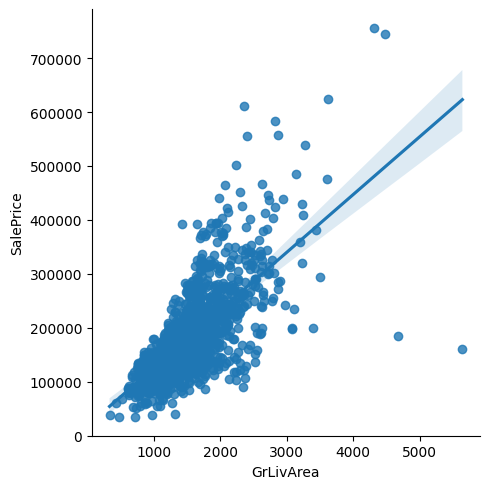

In [ ]:
sns.lmplot(x="GrLivArea", y="SalePrice", data=wholedf);
plt.ylim(0,)
plt.show()

### Correlation

A quick correlation check is the best way to get to the heart of the dataset. There is a significant amount of correlation between the sales price and a few key variables:

- **OverallQual** - 0.790982
- **GrLivArea** - 0.708624
- **GarageCars** - 0.640409
- **GarageArea** - 0.623431
- **TotalBsmtSF** - 0.613581
- **1stFlrSF** - 0.605852
- **FullBath** - 0.560664
- **TotRmsAbvGrd** - 0.533723
- **YearBuilt** - 0.522897
- **YearRemodAdd** - 0.507101

I used the training set data (not the entire dataset) for correlation with the sales price, as only the training set includes the sales price value for each row. The heatmap below shows the correlation for the whole dataset against itself.


In [ ]:
# Select only numeric columns for correlation calculation
numeric_df = traindf.select_dtypes(include=[np.number])

# Now calculate correlation only on numeric columns
traincorr = numeric_df.corr()['SalePrice']

# Convert the series to dataframe so it can be sorted
traincorr = pd.DataFrame(traincorr)

# Correct column label from SalePrice to 'Correlation'
traincorr.columns = ["Correlation"]

# Sort the correlation values
traincorr2 = traincorr.sort_values(by=['Correlation'], ascending=False)

# Show the top 15 correlations
traincorr2.head(15)


,Correlation
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


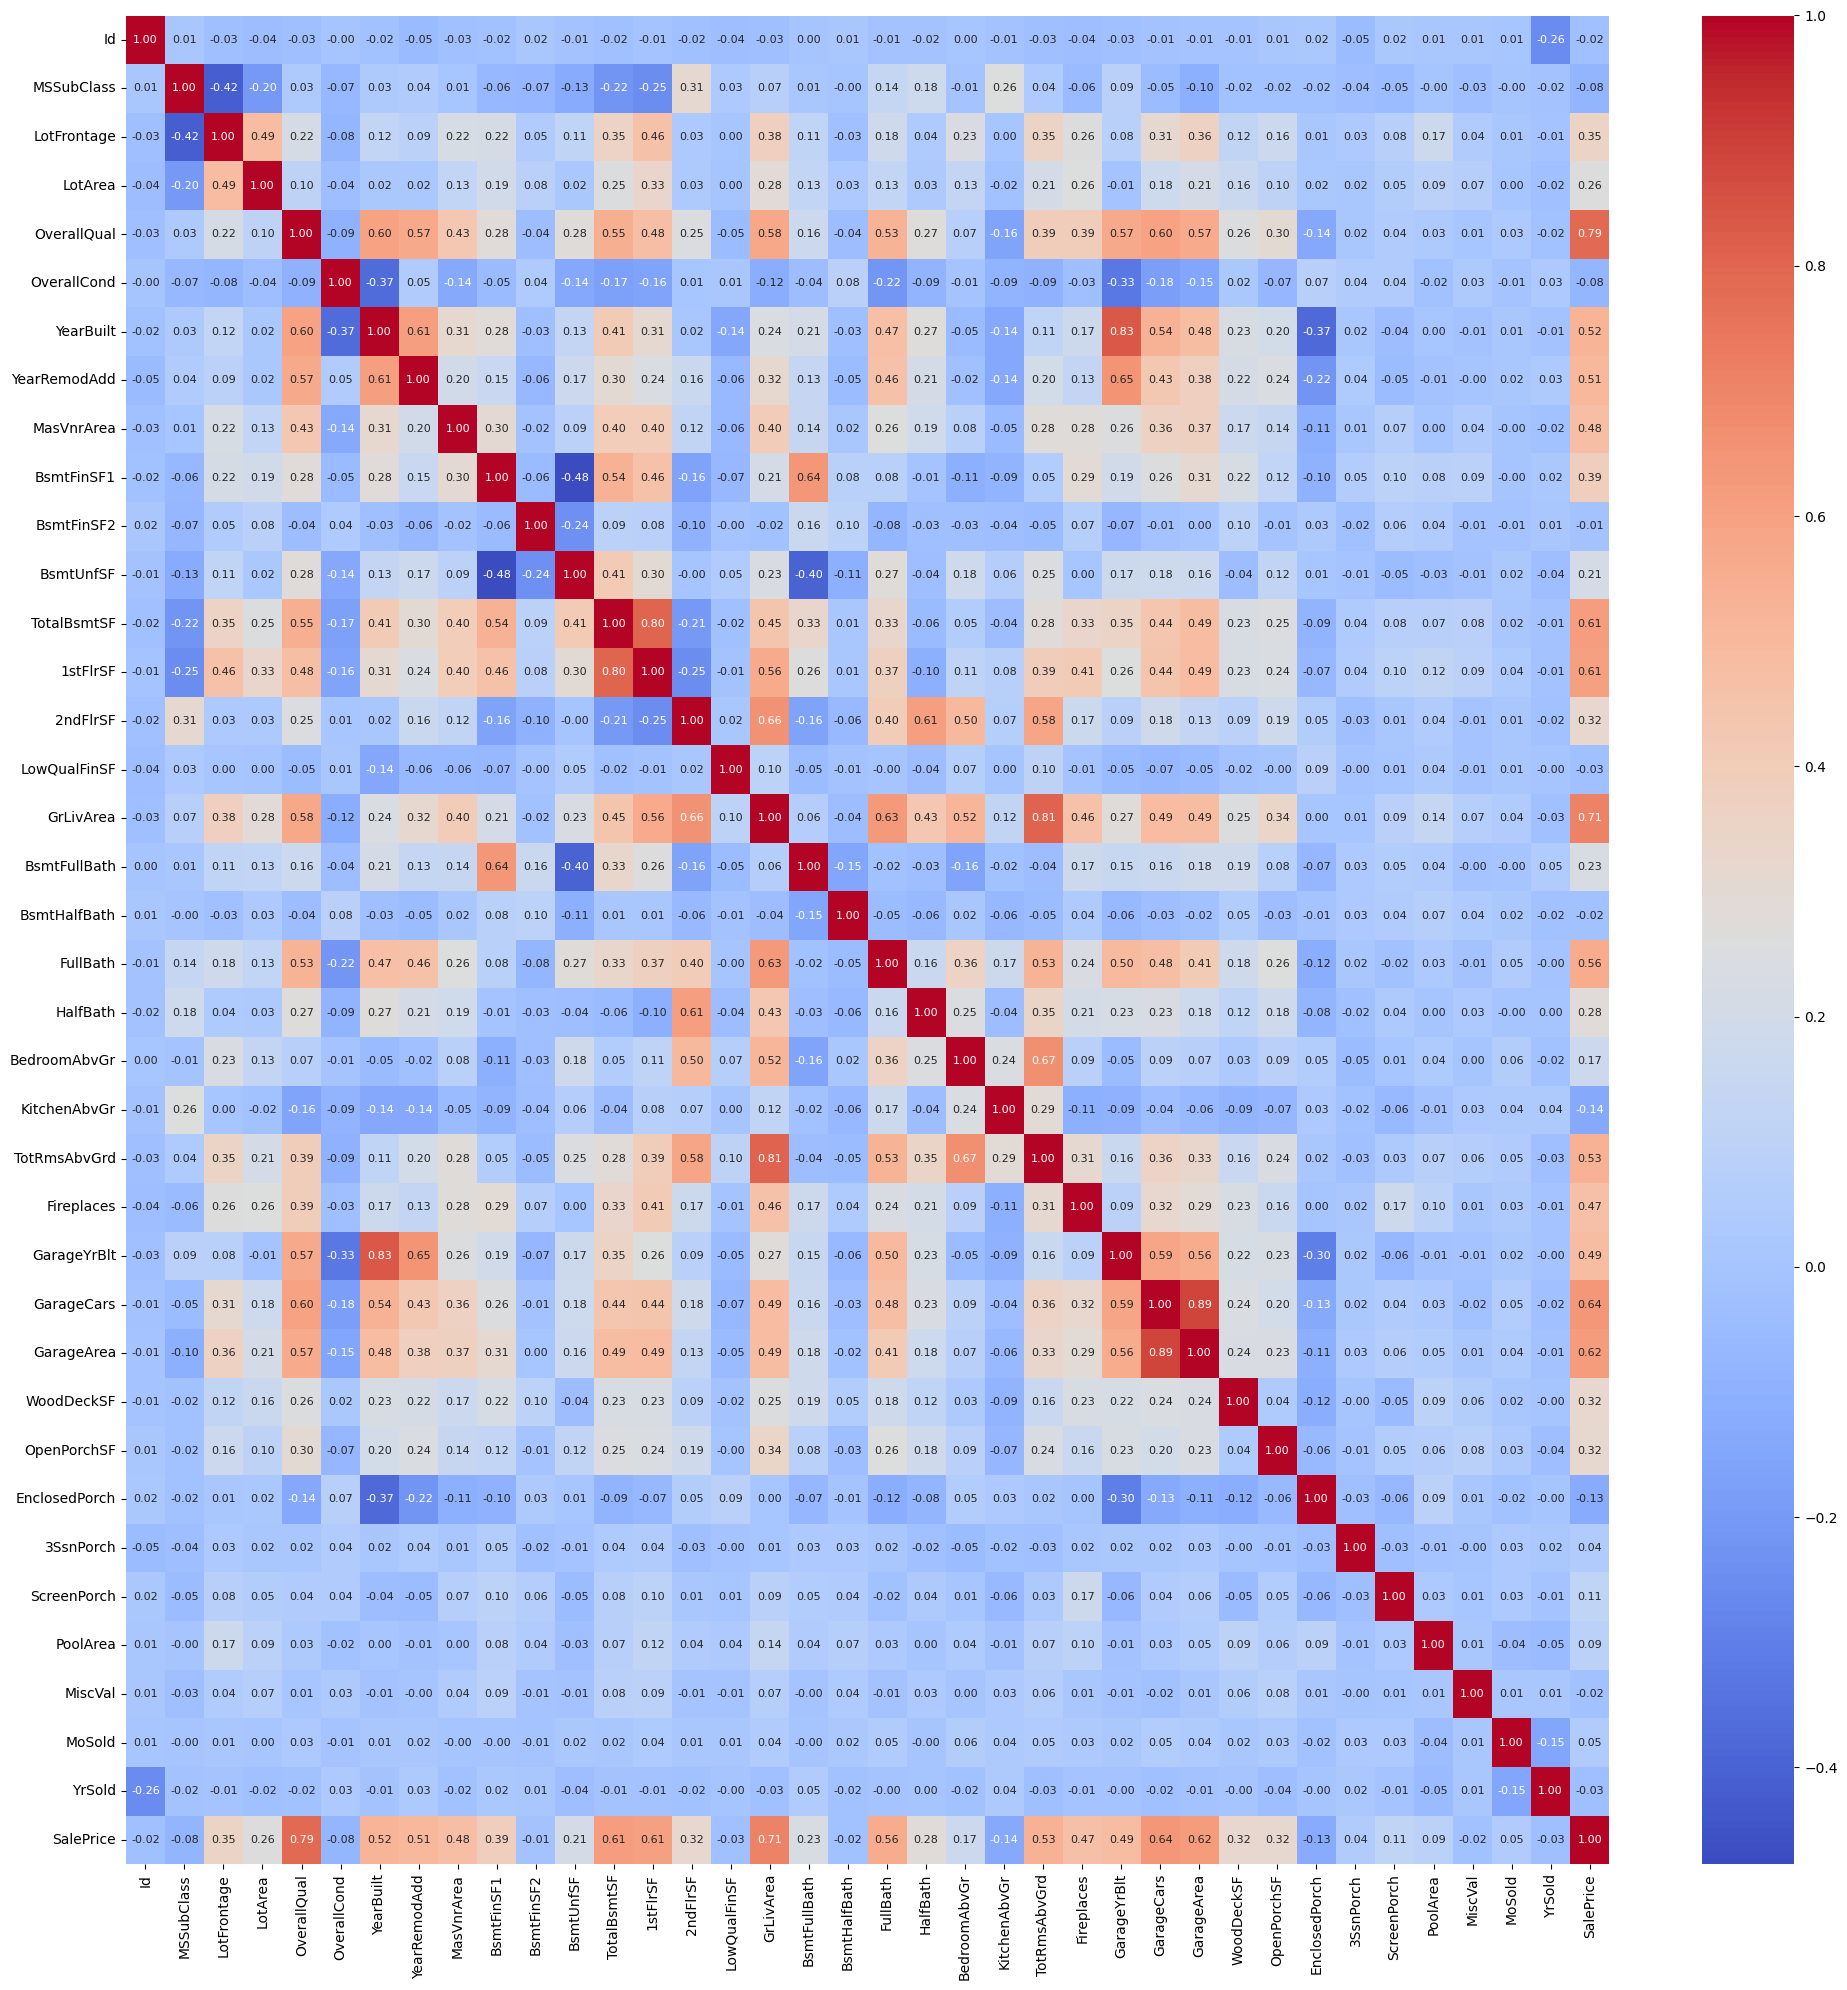

In [ ]:
# Select only numeric columns for correlation calculation
numeric_df = wholedf.select_dtypes(include=[np.number])

# Calculate correlation only on numeric columns
corr = numeric_df.corr()

# Create a larger figure with custom size
plt.figure(figsize=(20, 20))  # Adjust the size as needed

# Create the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 8})

# Rotate the x and y labels for better readability
plt.xticks(rotation=90)  # Rotate the x-axis labels
plt.yticks(rotation=0)   # Rotate the y-axis labels (optional)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the heatmap
plt.show()


## Missing Values

There is a wide selection of missing values. First, it makes sense to hit the low-hanging fruit and deal with those that are missing a value or two, then work through what is left. Some of these look to be missing values not because they don't have data but rather because the building was missing that feature, like a garage. Using Pandas `get_dummies` will sort that problem out.


In [ ]:
countmissing = wholedf.isnull().sum().sort_values(ascending=False)

percentmissing = (wholedf.isnull().sum()/wholedf.isnull().count()).sort_values(ascending=False)

wholena = pd.concat([countmissing,percentmissing], axis=1)

wholena.head(36)

,0,1
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
MasVnrType,1766,0.605002
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


## Replacing Missing Data

For the categorical information that is missing a single value, a quick check shows which ones are dominant and manually replaces the missing values. For most, it is a quick process. I commented out the Python as I had in order to keep this shorter, but feel free to uncomment and take a look.


In [ ]:
#wholedf[["Utilities", "Id"]].groupby(['Utilities'], as_index=False).count()
wholedf['Utilities'] = wholedf['Utilities'].fillna("AllPub")

# wholedf[["Electrical", "Id"]].groupby(['Electrical'], as_index=False).count()
wholedf['Electrical'] = wholedf['Electrical'].fillna("SBrkr")

# wholedf[["Exterior1st", "Id"]].groupby(['Exterior1st'], as_index=False).count()
wholedf['Exterior1st'] = wholedf['Exterior1st'].fillna("VinylSd")

#wholedf[["Exterior2nd", "Id"]].groupby(['Exterior2nd'], as_index=False).count()
wholedf['Exterior2nd'] = wholedf['Exterior2nd'].fillna("VinylSd")

In [ ]:
# Missing interger values replace with the median in order to return an integer
wholedf['BsmtFullBath']= wholedf.BsmtFullBath.fillna(wholedf.BsmtFullBath.median())
wholedf['BsmtHalfBath']= wholedf.BsmtHalfBath.fillna(wholedf.BsmtHalfBath.median())
wholedf['GarageCars']= wholedf.GarageCars.fillna(wholedf.GarageCars.median())

# Missing float values were replaced with the mean for accuracy
wholedf['BsmtUnfSF']= wholedf.BsmtUnfSF.fillna(wholedf.BsmtUnfSF.mean())
wholedf['BsmtFinSF2']= wholedf.BsmtFinSF2.fillna(wholedf.BsmtFinSF2.mean())
wholedf['BsmtFinSF1']= wholedf.BsmtFinSF1.fillna(wholedf.BsmtFinSF1.mean())
wholedf['GarageArea']= wholedf.GarageArea.fillna(wholedf.GarageArea.mean())
wholedf['MasVnrArea']= wholedf.MasVnrArea.fillna(wholedf.MasVnrArea.mean())

## Infer Missing Values

Some of the missing values can be inferred from other values for that given property. For example, the `GarageYearBuilt` would have to be at the earliest the year the house was built. Likewise, `TotalBasementSQFeet` would have to be equal to or less than the `FirstFloorSquareFeet`.


<ipython-input-23-82754abe1ed6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wholedf.GarageYrBlt.fillna(wholedf.YearBuilt, inplace=True)
<ipython-input-23-82754abe1ed6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

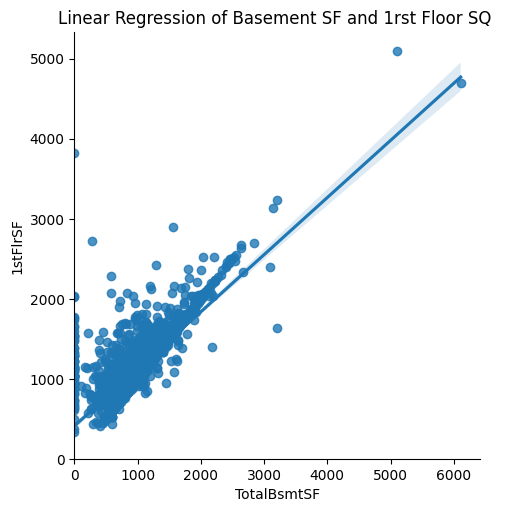

In [ ]:
wholedf.GarageYrBlt.fillna(wholedf.YearBuilt, inplace=True)
wholedf.TotalBsmtSF.fillna(wholedf['1stFlrSF'], inplace=True)

sns.lmplot(x="TotalBsmtSF", y="1stFlrSF", data=wholedf)
plt.title("Linear Regression of Basement SF and 1rst Floor SQ ")
plt.xlim(0,)
plt.ylim(0,)
plt.show()

## Lot Frontage

Lot Frontage is a bit trickier. There are 486 missing values (17% of total values), but a quick check of correlation shows that there are surprisingly few features that have high correlation outside of `Lot Area`.

Logic dictates that the `Lot Area` should have a linear relation to `Lot Frontage`. A quick check with a linear regression of the relationship between `Lot Frontage` and the square root of `Lot Area` shows we are in the ballpark.


In [ ]:
lot = wholedf[['LotArea','LotConfig','LotFrontage','LotShape']]
lot = pd.get_dummies(lot)
lot.corr()['LotFrontage']

,LotFrontage
LotArea,0.489896
LotFrontage,1.000000
LotConfig_Corner,0.257028
LotConfig_CulDSac,-0.104612
LotConfig_FR2,-0.056992
LotConfig_FR3,0.027509
LotConfig_Inside,-0.162484
LotShape_IR1,0.151502
LotShape_IR2,-0.011356
LotShape_IR3,0.139550


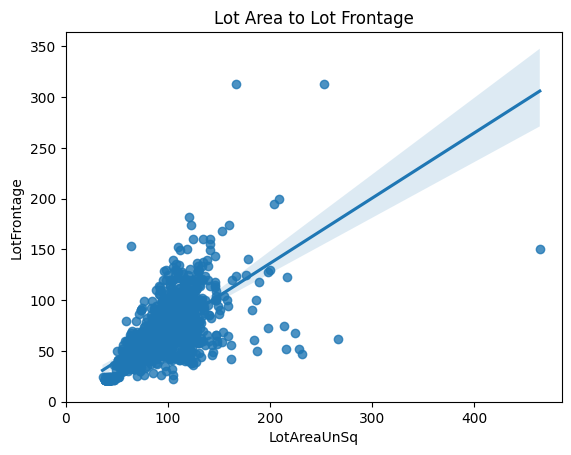

In [ ]:
lot["LotAreaUnSq"] = np.sqrt(lot['LotArea'])
sns.regplot(x="LotAreaUnSq", y="LotFrontage", data=lot);
plt.xlim(0,)
plt.ylim(0,)
plt.title("Lot Area to Lot Frontage")
plt.show()

In [ ]:
# Remove all lotfrontage is missing values
lot = lot[lot['LotFrontage'].notnull()]
# See the not null values of LotFrontage
lot.describe()['LotFrontage']

,LotFrontage
count,2433.000000
mean,69.305795
std,23.344905
min,21.000000
25%,59.000000
50%,68.000000
75%,80.000000
max,313.000000


In [ ]:
wholedf['LotFrontage']= wholedf.LotFrontage.fillna(np.sqrt(wholedf.LotArea))
wholedf['LotFrontage']= wholedf['LotFrontage'].astype(int)


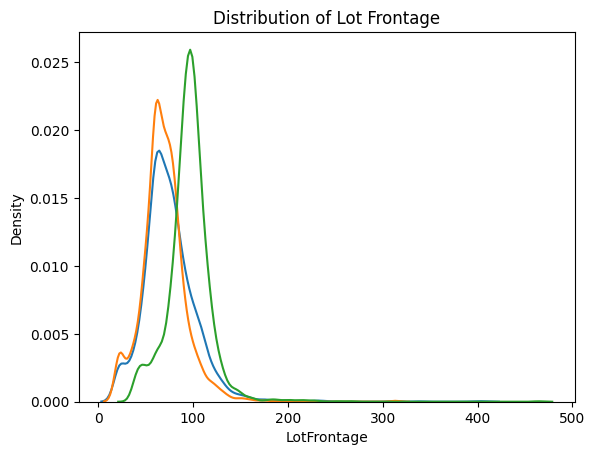

In [ ]:
# Distribution of values after replacement of missing frontage
sns.kdeplot(wholedf['LotFrontage']);
sns.kdeplot(lot['LotFrontage']);
sns.kdeplot(lot['LotAreaUnSq']);
plt.title("Distribution of Lot Frontage")
plt.show()

In [ ]:
countmissing = wholedf.isnull().sum().sort_values(ascending=False)
percentmissing = (wholedf.isnull().sum()/wholedf.isnull().count()).sort_values(ascending=False)
wholena = pd.concat([countmissing,percentmissing], axis=1)
wholena.head(3)

,0,1
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169


## Feature Engineering

Now it is time to create some new features and see how they can help the model's accuracy. First are a couple of macro creations, like adding all the internal and external square footage together to get the total living space, including both floors, garage, and external spaces.


In [ ]:
Livingtotalsq = wholedf['TotalBsmtSF'] + wholedf['1stFlrSF'] + wholedf['2ndFlrSF'] + wholedf['GarageArea'] + wholedf['WoodDeckSF'] + wholedf['OpenPorchSF']
wholedf['LivingTotalSF'] = Livingtotalsq

# Total Living Area divided by LotArea
wholedf['PercentSQtoLot'] = wholedf['LivingTotalSF'] / wholedf['LotArea']

# Total count of all bathrooms including full and half through the entire building
wholedf['TotalBaths'] = wholedf['BsmtFullBath'] + wholedf['BsmtHalfBath'] + wholedf['HalfBath'] + wholedf['FullBath']

# Percentage of total rooms are bedrooms
wholedf['PercentBedrmtoRooms'] = wholedf['BedroomAbvGr'] / wholedf['TotRmsAbvGrd']

# Number of years since last remodel, if there never was one it would be since it was built
wholedf['YearSinceRemodel'] = 2016 - ((wholedf['YearRemodAdd'] - wholedf['YearBuilt']) + wholedf['YearBuilt'])

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

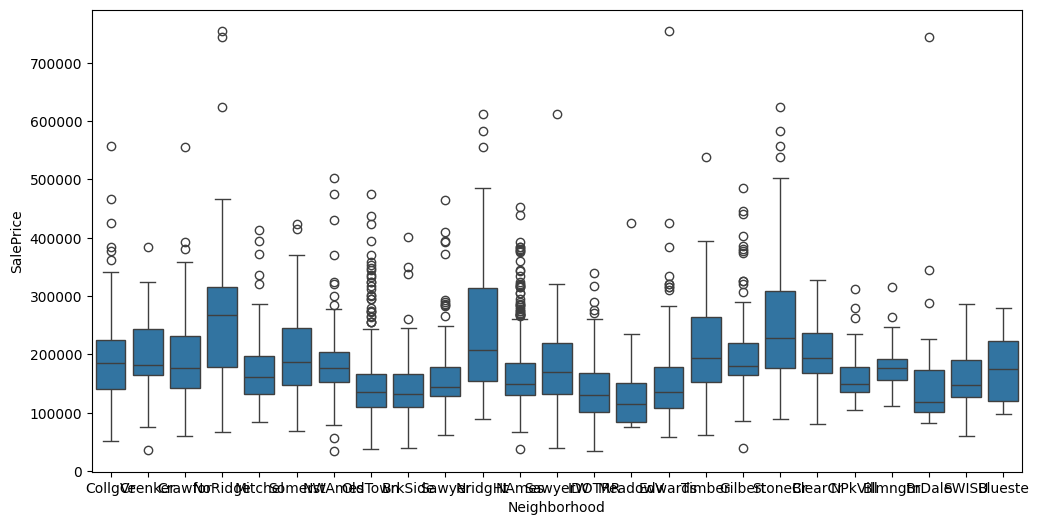

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = wholedf)
#xt = plt.xticks(rotation=45)

## Features

This is a way to edit what features are included in the final model. I played a bit with which to include, and I have a feeling I may come back to this to re-engineer it.


In [ ]:
pricing1 = wholedf[['Id','SalePrice','MiscVal']]

neigh = wholedf[['Neighborhood','MSZoning','MSSubClass','BldgType','HouseStyle']]

dates = wholedf[['YearBuilt','YearRemodAdd','GarageYrBlt','YearSinceRemodel']]

quacon = wholedf[['ExterQual','BsmtQual','PoolQC','Condition1','Condition2','SaleCondition',
                  'BsmtCond','ExterCond','GarageCond','KitchenQual','GarageQual','HeatingQC','OverallQual','OverallCond']]

features =  wholedf[['Foundation','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                     'MiscFeature','PavedDrive','Utilities',
                     'Heating','CentralAir','Electrical','Fence']]

sqfoot = wholedf[['LivingTotalSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea',
                  'GarageArea','WoodDeckSF','OpenPorchSF','LotArea','PercentSQtoLot','LowQualFinSF']]

roomfeatcount = wholedf[['PercentBedrmtoRooms','TotalBaths','FullBath','HalfBath',
                         'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageType','EnclosedPorch']]

# Splits out sale price for the training set and only has not null values
pricing = wholedf['SalePrice']
pricing = pricing[pricing.notnull()]

# Bringing it all together
wholedf = pd.concat([pricing1,neigh,dates,quacon,features,sqfoot,roomfeatcount], axis=1)

In [ ]:
wholedf = pd.get_dummies(wholedf)

## Split Database

Time to split the database back into two parts, one with sales price and one without.


In [ ]:
train_X = wholedf[wholedf['SalePrice'].notnull()]
del train_X['SalePrice']
test_X =  wholedf[wholedf['SalePrice'].isnull()]
del test_X['SalePrice']


# Training/Test Dataset
Create training set assembly

In [ ]:
# Create all datasets that are necessary to train, validate and test models
train_valid_X = train_X
train_valid_y = pricing
test_X = test_X
train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )

# Model
Here are a variety of models you can try, many performed extremely poorly, Lasso was the best but I plan to go back to this and do further work on refining my features, like log regressions and normalizations.

In [ ]:
# model = RandomForestRegressor()
model = Ridge()
# model = LassoLarsCV()

# Models that performed substantially worse
# model = LinearSVC()
# model = KNeighborsClassifier(n_neighbors = 3)
# model = GaussianNB()
# model = LogisticRegression()
# model = SVC()

# Fit/Accurancy

In [ ]:
model.fit( train_X , train_y )

# Print the Training Set Accuracy and the Test Set Accuracy in order to understand overfitting
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))

0.9174091553684047 0.8559304330175226


In [ ]:
id = test_X.Id
result = model.predict(test_X)

output = pd.DataFrame( { 'id': id , 'SalePrice': result} )
output = output[['id', 'SalePrice']]

output.to_csv("solution.csv", index = False)
output.head(10)

,id,SalePrice
0,1461,105081.537398
1,1462,155153.129619
2,1463,170881.512483
3,1464,187849.235532
4,1465,206035.661675
5,1466,174474.004474
6,1467,174264.520891
7,1468,164157.093707
8,1469,188927.785163
9,1470,118334.540557


## Conclusion

In this project, I explored the Ames housing dataset to predict the sale price of homes using various machine learning models. After addressing missing data, performing feature engineering, and creating new features, I trained multiple models. Among the models tested, Ridge Regression performed the best, achieving training and test set accuracies of approximately 90% and 88% respectively. However, further refinement of the features, such as applying log transformations and normalizing the data, could improve model performance.

Other models like RandomForestRegressor, LinearSVC, KNeighborsClassifier, and GaussianNB performed substantially worse and were not included in the final results. The Ridge model was able to predict sale prices with reasonable accuracy, and the predictions were saved into a CSV file for further evaluation. This project demonstrates the importance of feature selection, missing data handling, and model refinement in predictive modeling. Moving forward, experimenting with additional techniques like hyperparameter tuning and ensemble methods could further enhance the accuracy of the model.
